# Домашнее задание №2

<span style="color: red; font-size: 14pt">Дедлайн: 13 марта 23:59</span>

Машинное обучение, ФИВТ, Весна 2018

Составлено с использованием материалов Евгения Колмакова и Юрия Кашницкого (открытый курс машинного обучения, тема 3), а также лекций по машинному обучению Евгения Соколова

**Оформление дз**: 
- Присылайте выполненное задание на почту ``ml.course.mipt@gmail.com``
- Укажите тему письма в следующем формате ``ML2018_fall <номер_группы> <фамилия>``, к примеру -- ``ML2018_fall 596 ivanov``
- Выполненное дз сохраните в файл ``ML2018_<фамилия>_<группа>_task<номер задания>.ipnb``, к примеру -- ``ML2018_ivanov_596_task1.ipnb``

**Вопросы**:
- Присылайте вопросы на почту ``ml.course.mipt@gmail.com``
- Укажите тему письма в следующем формате ``ML2018_fall Question <Содержание вопроса>``

--------
- **PS1**: Используются автоматические фильтры, мы не найдем ваше дз, если вы укажете тему письма в неправильном формате.
- **PS2**: Просроченный дедлайн снижает максимальный вес задания по формуле, указнной на первом семинаре

## Часть 0. Вопросы для самоконтроля

##### Перед выполнением задания убедитесь, что вы знаете ответы на этот теор.минимум
##### Эта часть задания не оценивается, ответы можно не записывать

1. Что такое решающее дерево? Как по построенному дереву найти прогноз для объекта?
2. Почему для любой выборки можно построить дерево, имеющее нулевую ошибку на ней? Приведите примеры.
3. Почему не рекомендуется строить небинарные деревья (имеющие более двух потомков у каждой вершины)?
4. Как устроен жадный алгоритм построения дерева?
5. Какие критерии информативности для решения задачи классификации вы знаете?
6. Какой смысл у критерия Джини и энтропийного критерия?
7. Какие критерии информативности для решения задачи регрессии вы знаете?
8. Что такое pruning (стрижка) дерева? Чем отличаются post-pruning и pre-pruning?
9. Какие методы обработки пропущенных значений вы знаете?
10. Как учитывать категориальные признаки в решающем дереве?
11. Что такое mean target encoding? Почему эта техника хорошо работает для решающих деревьев?
12. Как работает отбор признаков с помощью решающих деревьев?

## Часть 1. Теоретические задачи

##### 30% баллов за задание, оценочное время выполнения 1 час

##### Решение можно затехать здесь или написать от руки и добавить фото в ноутбук

### Задача 1 (10% баллов)

Какая стратегия поведения в листьях регрессионного дерева приводит к меньшему матожиданию ошибки по MSE: отвечать средним значением таргета на объектах обучающей выборки, попавших в лист, или отвечать таргетом для случайного объекта из листа (считая все объекты равновероятными)?

**Решение:**

Положим, мы хотим предсказать значение случайной величины $y$. При этом в листе у нас находятся значения $c = \{c_1, ..., c_n\}$.

Тогда выпишем мат. ожидание ошибки MSE для двух следующих прогнозов:

* $\hat{y} = \frac1n \sum\limits_{i = 1}^{n} c_i$
$$\mathsf{E}(y - \frac1n \sum\limits_{i = 1}^{n} c_i)^2 = \mathsf{E}y^2 + \left( \frac1n \sum\limits_{i = 1}^{n} c_i \right)^2 - 2\left( \frac1n \sum\limits_{i = 1}^{n} c_i \right)\mathsf{E}y$$

* $\hat{y} = X$, где $X \sim U(c)$
$$\mathsf{E}\frac{1}{n}\sum\limits_{i = 1}^{n}(y - c_i)^2 =
  \frac{1}{n} \sum\limits_{i = 1}^{n} \mathsf{E} (y - c_i)^2 =
  \mathsf{E}y^2 + \frac{1}{n} \sum\limits_{i = 1}^{n} c_i^2 - \frac{2}{n}\mathsf{E} y \sum\limits_{i = 1}^{n}     c_i$$
  
Тогда выпишем их разность:
$$\mathsf{E}\frac{1}{n}\sum\limits_{i = 1}^{n}(y - c_i)^2 - \mathsf{E}(y - \overline{c})^2 =
  \frac{1}{n}\sum\limits_{i = 1}^{n} c_i^2 - \left(\frac{1}{n}\sum\limits_{i = 1}^{n} c_i \right)^2 \geq 0 \text{ (По неравенсту Коши-Буняковского)}$$

Получили, что мат. ожидание ошибки для первого поведения меньше, чем для второго.

### Задача 2 (15% баллов)

Критерий информативности для набора объектов $L$ вычисляется на основе того, насколько хорошо их целевые переменные предсказываются константой (при оптимальном выборе этой константы):
$$H(R) = \min_{c \in Y} \dfrac{1}{|R|} \sum_{(x_i,y_i) \in R} L(y_i, c),$$
где $L(y_i, c)$- некоторая функция потерь. Соответственно, чтобы получить вид критерия при конкретной функции потерь, необходимо аналитически найти оптимальное значение константы и подставить его в формулу для $H(R)$.

Выведите критерии информативности для следующих функций потерь:
1. $L(y,c) = (y-c)^2$
2. $L(y,c) = \sum_{k=1}^K (c_k-[y=k])^2$
3. $L(y,c) = -\sum_{k=1}^K [y=k]\log c_k$

**Подсказка**:
должны получиться дисперия, критерий Джини и энтропийный критерий.

**Решение:**

Обозначим за $S(c, R) = \frac{1}{|R|}\sum\limits_{(x_i, y_i) \in R}L(y_i, c)$.

1. $L(y,c) = (y-c)^2$
   
   Так как $H(R) = \min_{c \in Y} S(c, R)$. Тогда для нахождения оптимального значения константы найдём частную производную $S(c, R)$ по $c$.
   $$\frac{\partial}{\partial c}S(c, R) = -\frac{2}{|R|}\sum\limits_{(x_i, y_i) \in R}(y_i - c) = 0$$
   $$c = \frac{1}{|R|}\sum\limits_{(x_i, y_i) \in R}y_i$$
   Тогда для данной функции потерь получаем следующий критерий:
   $$H(R) = \frac{1}{|R|} \sum\limits_{(x_i, y_i) \in R} \left(y_i - \frac{1}{|R|} \sum\limits_{(x_j, y_j) \in R} y_i\right)$$
   Это действительно выборочная дисперсия.
   
2. $L(y,c) = \sum_{k=1}^K (c_k-[y=k])^2$

   Теперь будем считать частные производные $S(c, R)$ по каждой компоненте $c_k$.
   $$\frac{\partial}{\partial c_k}S(c, R) = \frac{2}{|R|} \sum\limits_{(x_i, y_i) \in R}(c_k - [y_i = k]) = 0$$
   Введём следующее обозначение:
   $$p_k = \frac{1}{|R|} \sum\limits_{(x_i, y_i) \in R)} [y_i = k]$$
   Тогда получаем следующее:
   $$c_k = p_k$$
   Теперь получим выражение для критерия:
   $$H(R) = \frac{1}{|R|} \sum\limits_{(x_i, y_i) \in R}\sum\limits_{k = 1}^{K} (p_k - [y_i = k])^2 =
     \frac{1}{|R|} \sum\limits_{(x_i, y_i) \in R}\sum\limits_{k = 1}^{K} (p_k^2 - 2p_k[y_i = k] + [y_i = k]) =
     \frac{1}{|R|} \sum\limits_{(x_i, y_i) \in R}\left(1 + \sum\limits_{k = 1}^{K} (p_k^2 - 2p_k[y_i = k]) \right) =$$
   $$= 1 + \frac{1}{|R|} \sum\limits_{k = 1}^{K}p_k\left( |R|p_k - 2\sum\limits_{(x_i, y_i) \in R} [y_i = k]\right) =
     1 + \sum\limits_{k = 1}^{K}p_k\left( p_k - 2\underbrace{\frac{1}{|R|}\sum\limits_{(x_i, y_i) \in R} [y_i = k]}_{= p_k \text{ по определению}}\right) =
     1 - \sum\limits_{k = 1}^{K}p_k^2$$
   Получили критерий Джини.

3. $L(y,c) = -\sum_{k=1}^K [y=k]\log c_k$

   Сначала заметим, что без огранчений на $c_k$ мы можем просто устремить все $c_k$ к $+\infty$, и получить, что $L(y, c)\rightarrow -\infty$.
   
   Таким образом появляется необходимость ввести ограничение. Пусть это будет $\sum\limits_{k = 1}^{K} c_k = 1.

   Тогда выпишем Лагранжиан для нашей функции с условием:
   $$l(c, \lambda) = -\frac{1}{|R|} \sum\limits_{(x_i, y_i) \in R} \sum\limits_{k = 1}^{K} [y_i = k]\log c_k +
     \lambda \left(\sum\limits_{k = 1}^{K} c_ k - 1\right)$$

   Также найдём частные производные $l(c, \lambda)$ по $c_k$ и $\lambda$:
   $$\frac{\partial}{\partial c_k}l(c, \lambda) = -\frac{1}{|R|} \sum\limits_{(x_i, y_i) \in R} \frac{[y_i = k]}{c_k} +      \lambda = 0$$
   $$\frac{\partial}{\partial \lambda} l(c, \lambda) = \sum\limits_{k = 1}^{K} c_k - 1 = 0$$
   
   Отсюда получаем следующее:
   $$\lambda c_k = p_k$$
   $$1 = \sum\limits_{k = 1}^{K} \frac{p_k}{\lambda} \Rightarrow \lambda = 1$$
   
   Из условия $\lambda = 1$ получаем
   $$c_k = p_k$$
   
   Теперь найдём $H(R)$:
   $$H(R) = -\frac{1}{|R|} \sum\limits_{(x_i, y_i) \in R} \sum\limits_{k = 1}^{K} [y_i = k]\log p_k =
     - \sum\limits_{k = 1}^{K} \log p_k \underbrace{\frac{1}{|R|} \sum\limits_{(x_i, y_i) \in R} [y_i = k]}_{=p_k \text{ по        определению}} = -\sum\limits_{k = 1}^{K} p_k \log p_k$$
     
   Получили энтропийный критерий. 

### Задача 3 (5% баллов)

Запишите оценку сложности построения одного решающего дерева в зависимости от размера обучающей выборки $l$, числа признаков $d$, максимальной глубины дерева $D$. В качестве предикатов используются пороговые функции $[x_j>t]$. При выборе предиката в каждой вершине перебираются все признаки, а в качестве порогов рассматриваются величины $t$, равные значения этого признака на объектах, попавших в текущую вершину. Считайте сложность вычисления критерия информативноси константной.

**Решение:**

Разобьём наше деревона уровни по глубине. Заметим, что что на каждом уровне каждый объект из выборки проверяется не больше одного раза. При этом каждый объект проверяется по всем признакам. Таким образом у нас есть $\underline{O}(D)$ уровней. На каждом обрабатывается по $\underline{O}(l)$ объектов. Для каждого объекта обрабатывается по $d$ признаков.
Учитывая то, что вычисление критерия имеет константную сложность, получаем сумарную сложность алгоритма $\underline{O}(Dld)$.

## Часть 2. Визуализация решающих деревьев

##### 20% баллов за задание, оценочное время выполнения 30 минут

Для начала нужно поставить GraphViz

- На macOS:
    - sudo pip install pydotplus
    - brew install graphviz
- Linux должно работать то же самое с заменой brew на sudo apt-get
    - sudo pip install pydotplus
    - sudo apt-get install graphviz
- Windows
    - Установить GraphViz отсюда: http://www.graphviz.org/Download_windows.php
    - Добавить путь к папке bin в PATH (например, "C:\Programs\Graphviz2.38\bin")
    - pip install pydotplus

In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import preprocessing
from sklearn.metrics import accuracy_score

%matplotlib inline

Постройте решающее дерево из sklearn на датасете Car Evaluation Dataset (https://archive.ics.uci.edu/ml/datasets/car+evaluation)

In [5]:
!wget https://archive.ics.uci.edu/ml/machine-learning-databases/car/car.data

--2018-03-11 01:43:57--  https://archive.ics.uci.edu/ml/machine-learning-databases/car/car.data
Resolving archive.ics.uci.edu (archive.ics.uci.edu)... 128.195.10.249
Connecting to archive.ics.uci.edu (archive.ics.uci.edu)|128.195.10.249|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 51867 (51K) [text/plain]
Saving to: ‘car.data.3’

car.data.3          100%[===================>]  50,65K   126KB/s    in 0,4s    

2018-03-11 01:43:58 (126 KB/s) - ‘car.data.3’ saved [51867/51867]



In [6]:
column_names = ['buying', 'maint', 'doors', 'persons', 'lug_boot', 'safety', 'class']
car_df = pd.read_csv('car.data', error_bad_lines=False, names=column_names)
car_df.head()

,buying,maint,doors,persons,lug_boot,safety,class
0,vhigh,vhigh,2,2,small,low,unacc
1,vhigh,vhigh,2,2,small,med,unacc
2,vhigh,vhigh,2,2,small,high,unacc
3,vhigh,vhigh,2,2,med,low,unacc
4,vhigh,vhigh,2,2,med,med,unacc


In [7]:
car_df.shape

(1728, 7)

In [8]:
def number_encode_features(init_df):
    result = init_df.copy()
    encoders = {}
    for column in result.columns:
        if result.dtypes[column] == np.object:
            encoders[column] = preprocessing.LabelEncoder()
            result[column] = encoders[column].fit_transform(result[column])
    return result, encoders

In [9]:
encoded_data, encoders = number_encode_features(car_df)
objects = encoded_data[encoded_data.columns[:-1]]
target = encoded_data[encoded_data.columns[-1]]

In [10]:
from sklearn.tree import DecisionTreeClassifier

estimator = DecisionTreeClassifier()
estimator.fit(objects, target)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

Визуализируйте получившееся дерево с помощью GraphViz (следующая функция может помочь):

In [11]:
import IPython.display #needed to render in notebook
import pydot  #needed to convert dot format to png
from io import StringIO
from sklearn import tree

def draw_decision_tree(clf, column_names):
    dot_data = StringIO()
    tree.export_graphviz(clf, out_file=dot_data, feature_names=column_names) 
    graph = pydot.graph_from_dot_data(dot_data.getvalue())
    a = IPython.display.Image(graph[0].create_png())
    IPython.display.display(a)

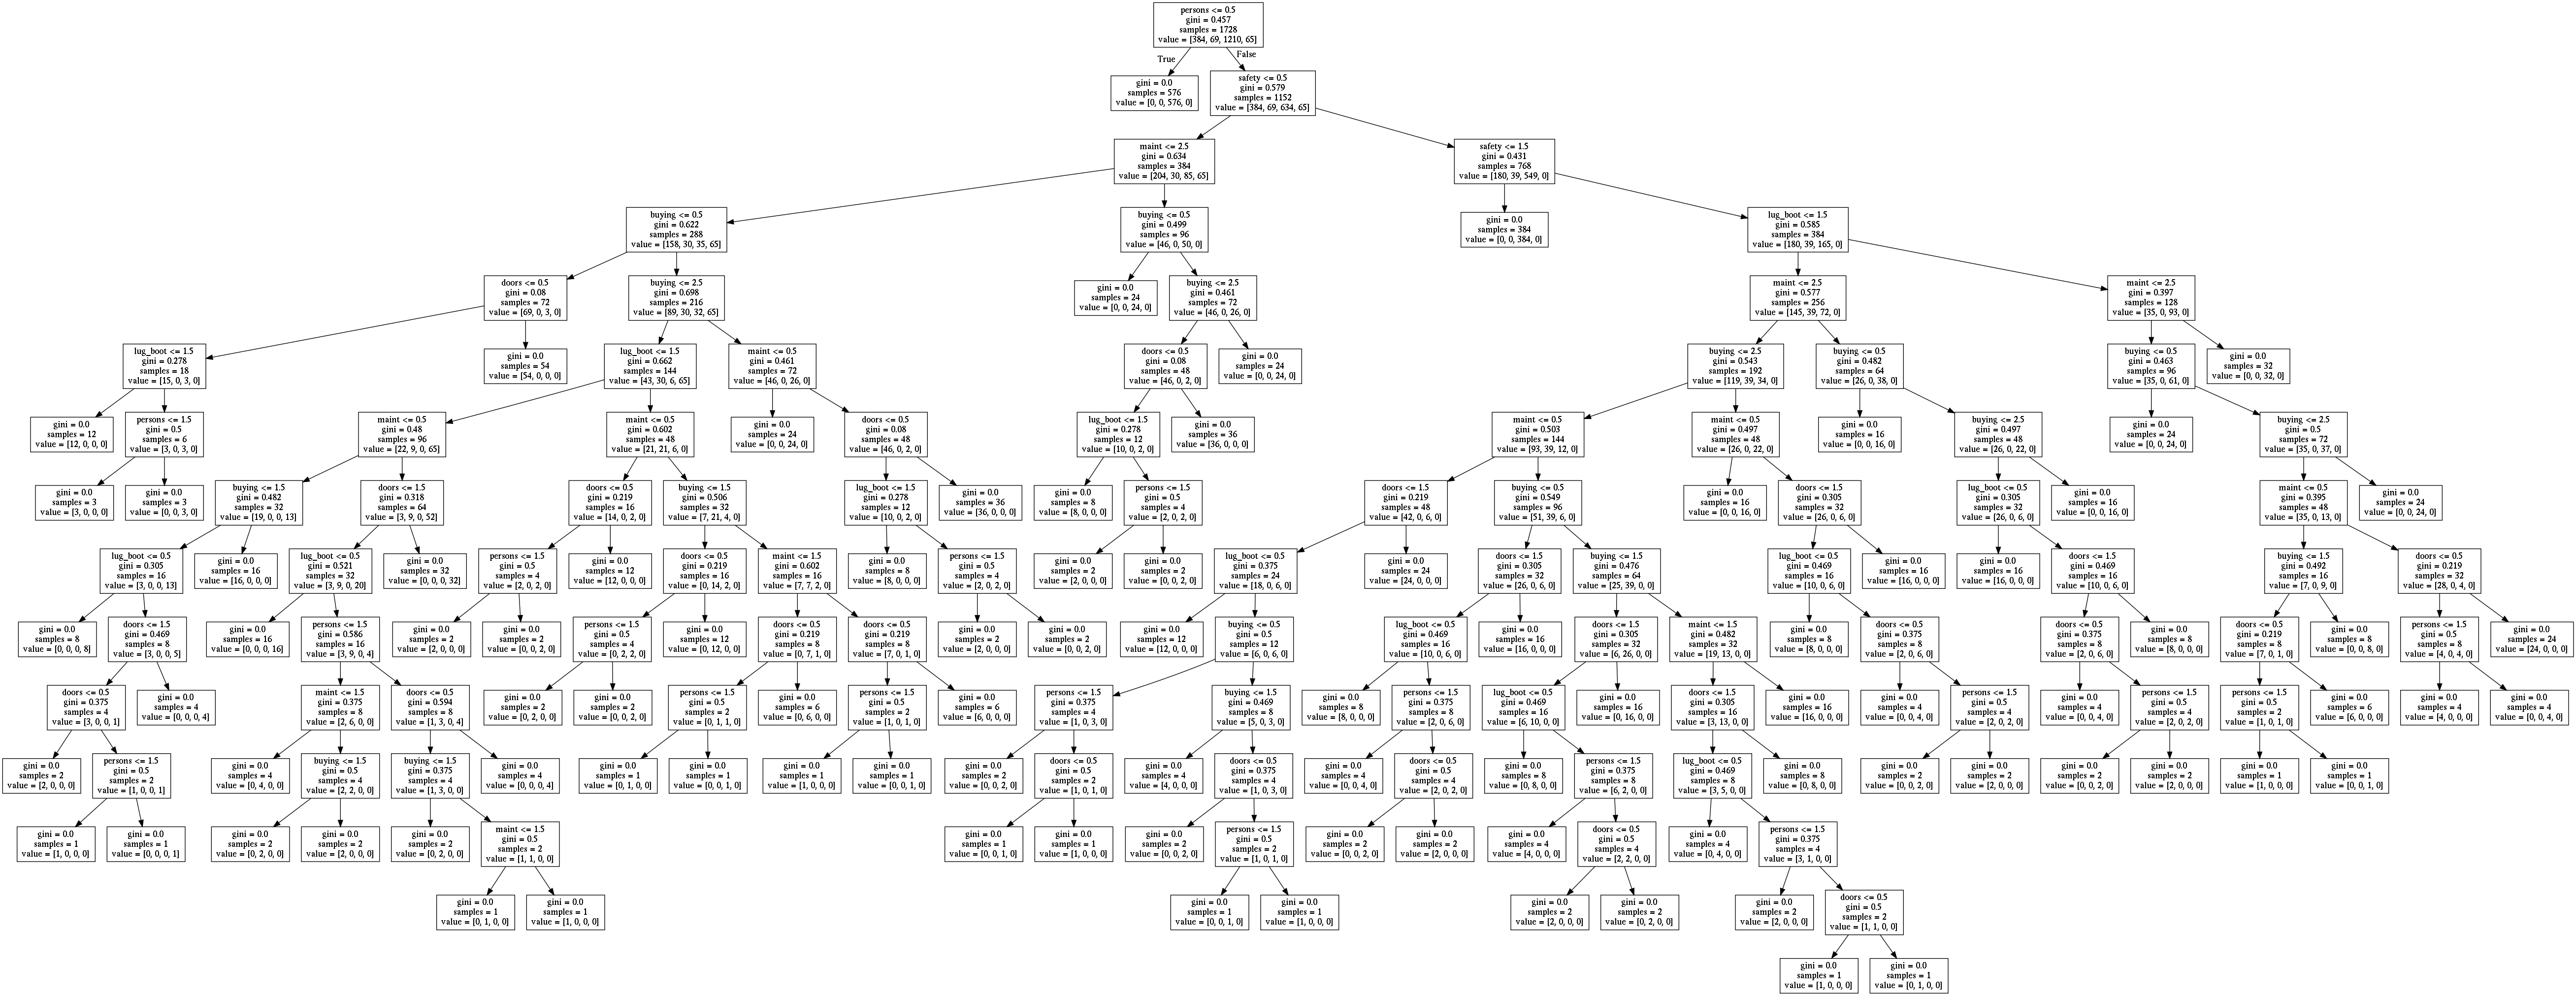

1.0

In [12]:
draw_decision_tree(estimator, column_names[:-1])
accuracy_score(estimator.predict(objects), target)

Как видно, без ограничений дерево строится "до конца" и идеально подстраивается под обучающую выборку.

Посмотрите, как меняется картинка для различных значений структурных параметров (варьируйте параметры max_depth, criterion, min_samples_leaf, max_features). Убедитесь, что увеличение глубины дерева и уменьшение количества объектов в листьях способствует гибкости модели и, как следствие, переобучению (что соответствует интуитивным соображениям о структуре дерева).

In [13]:
depths = [5, 7, 10]
criteria = ['gini', 'entropy']

Criterion: gini, depth: 5


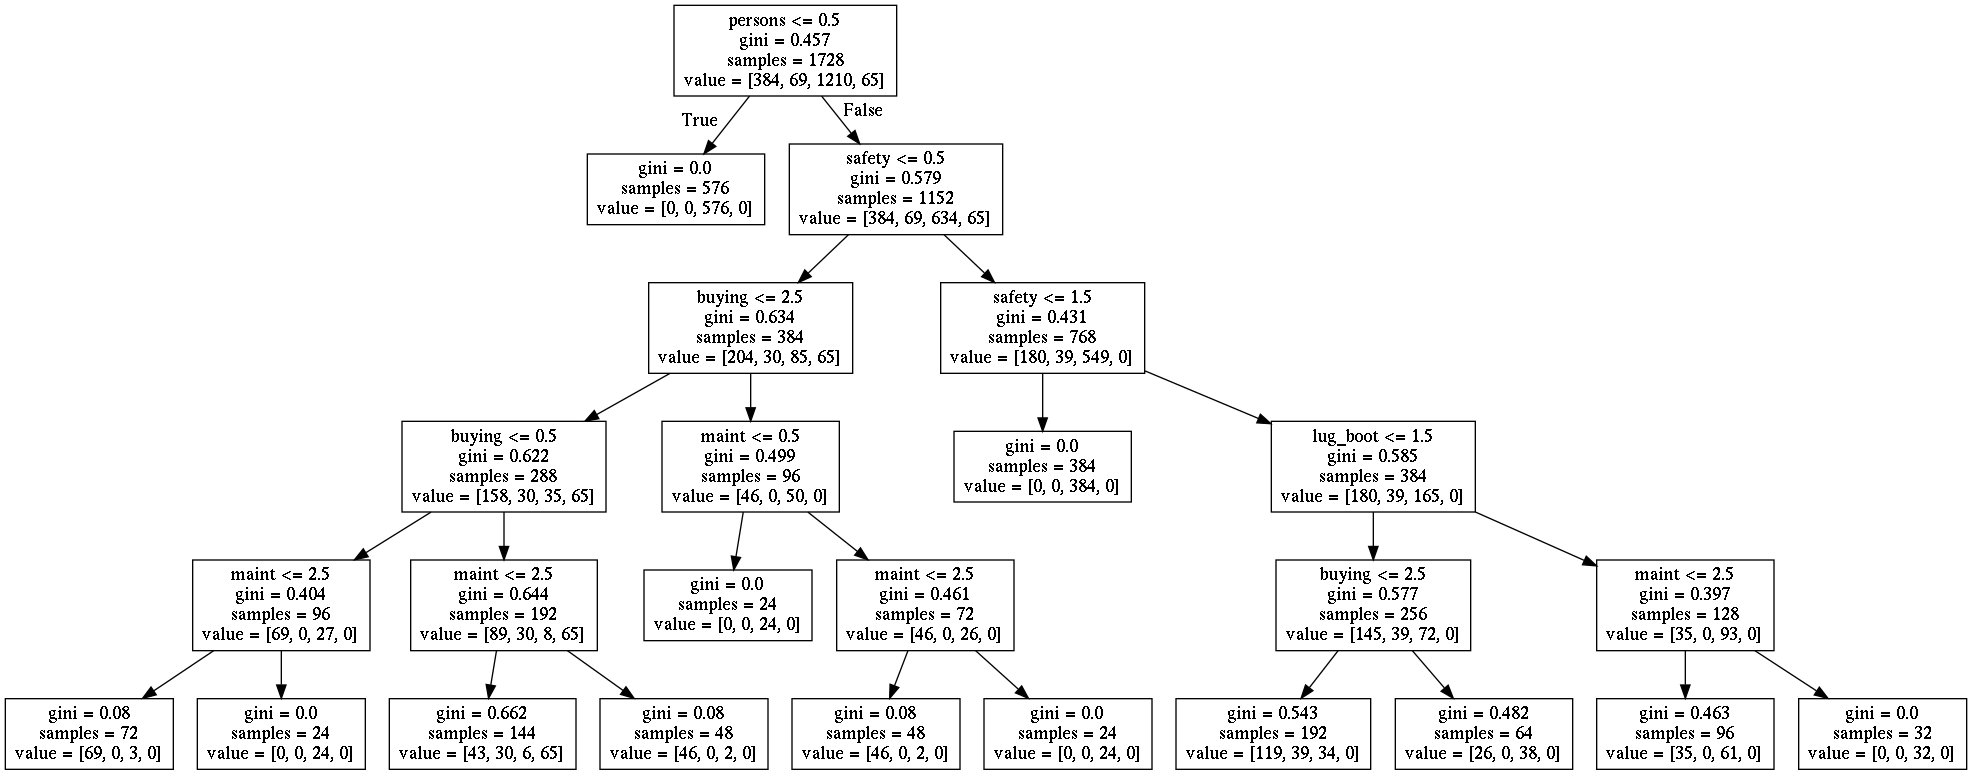

0.872685185185
Criterion: entropy, depth: 5


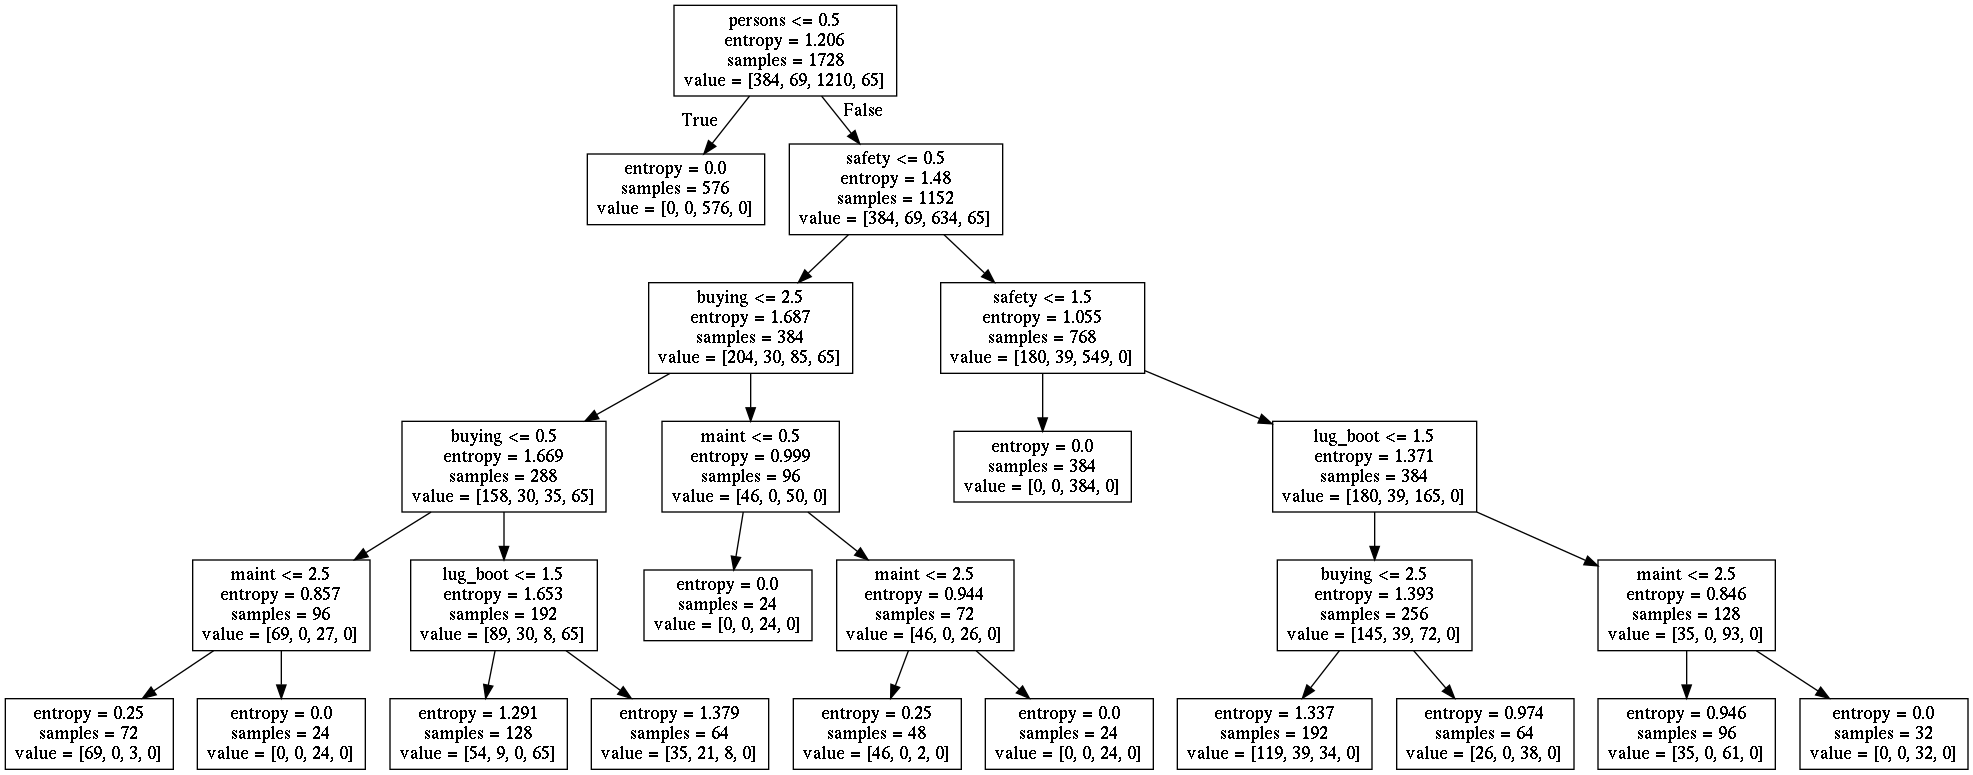

0.866319444444
Criterion: gini, depth: 7


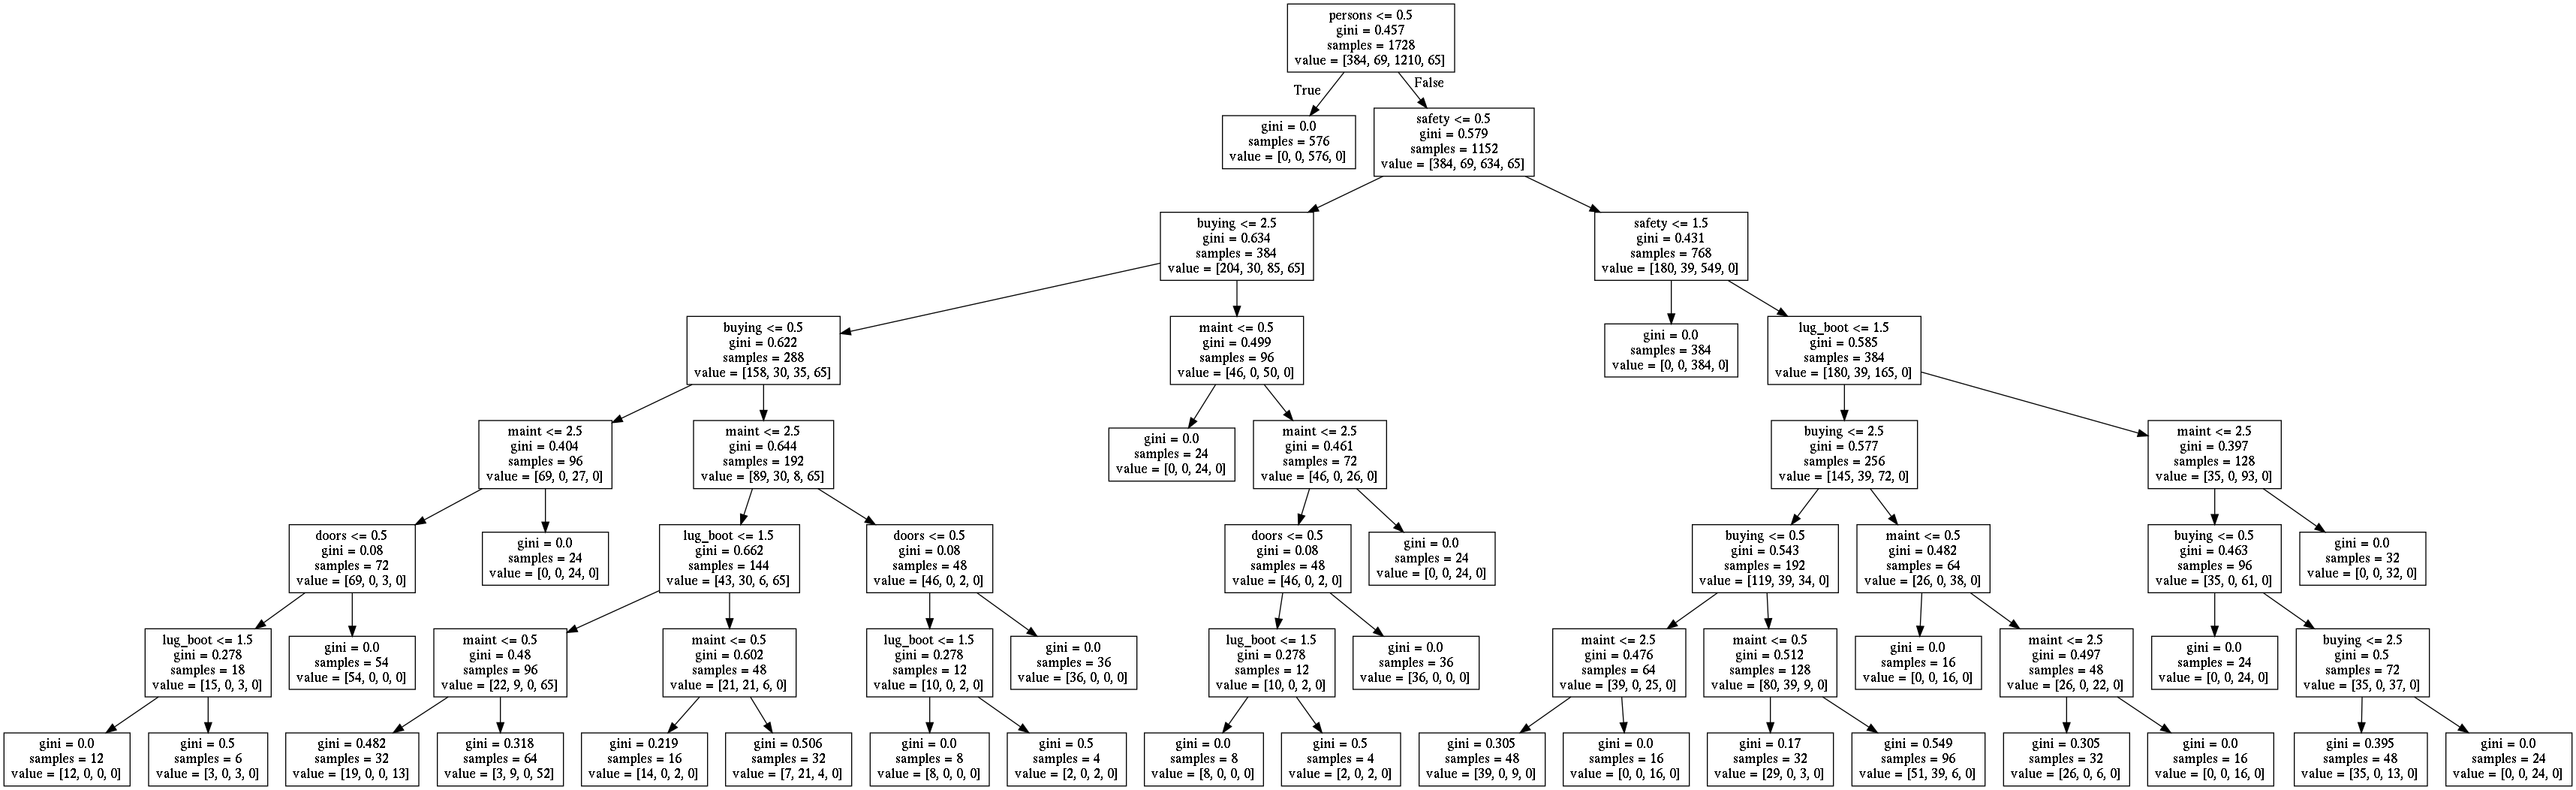

0.929976851852
Criterion: entropy, depth: 7


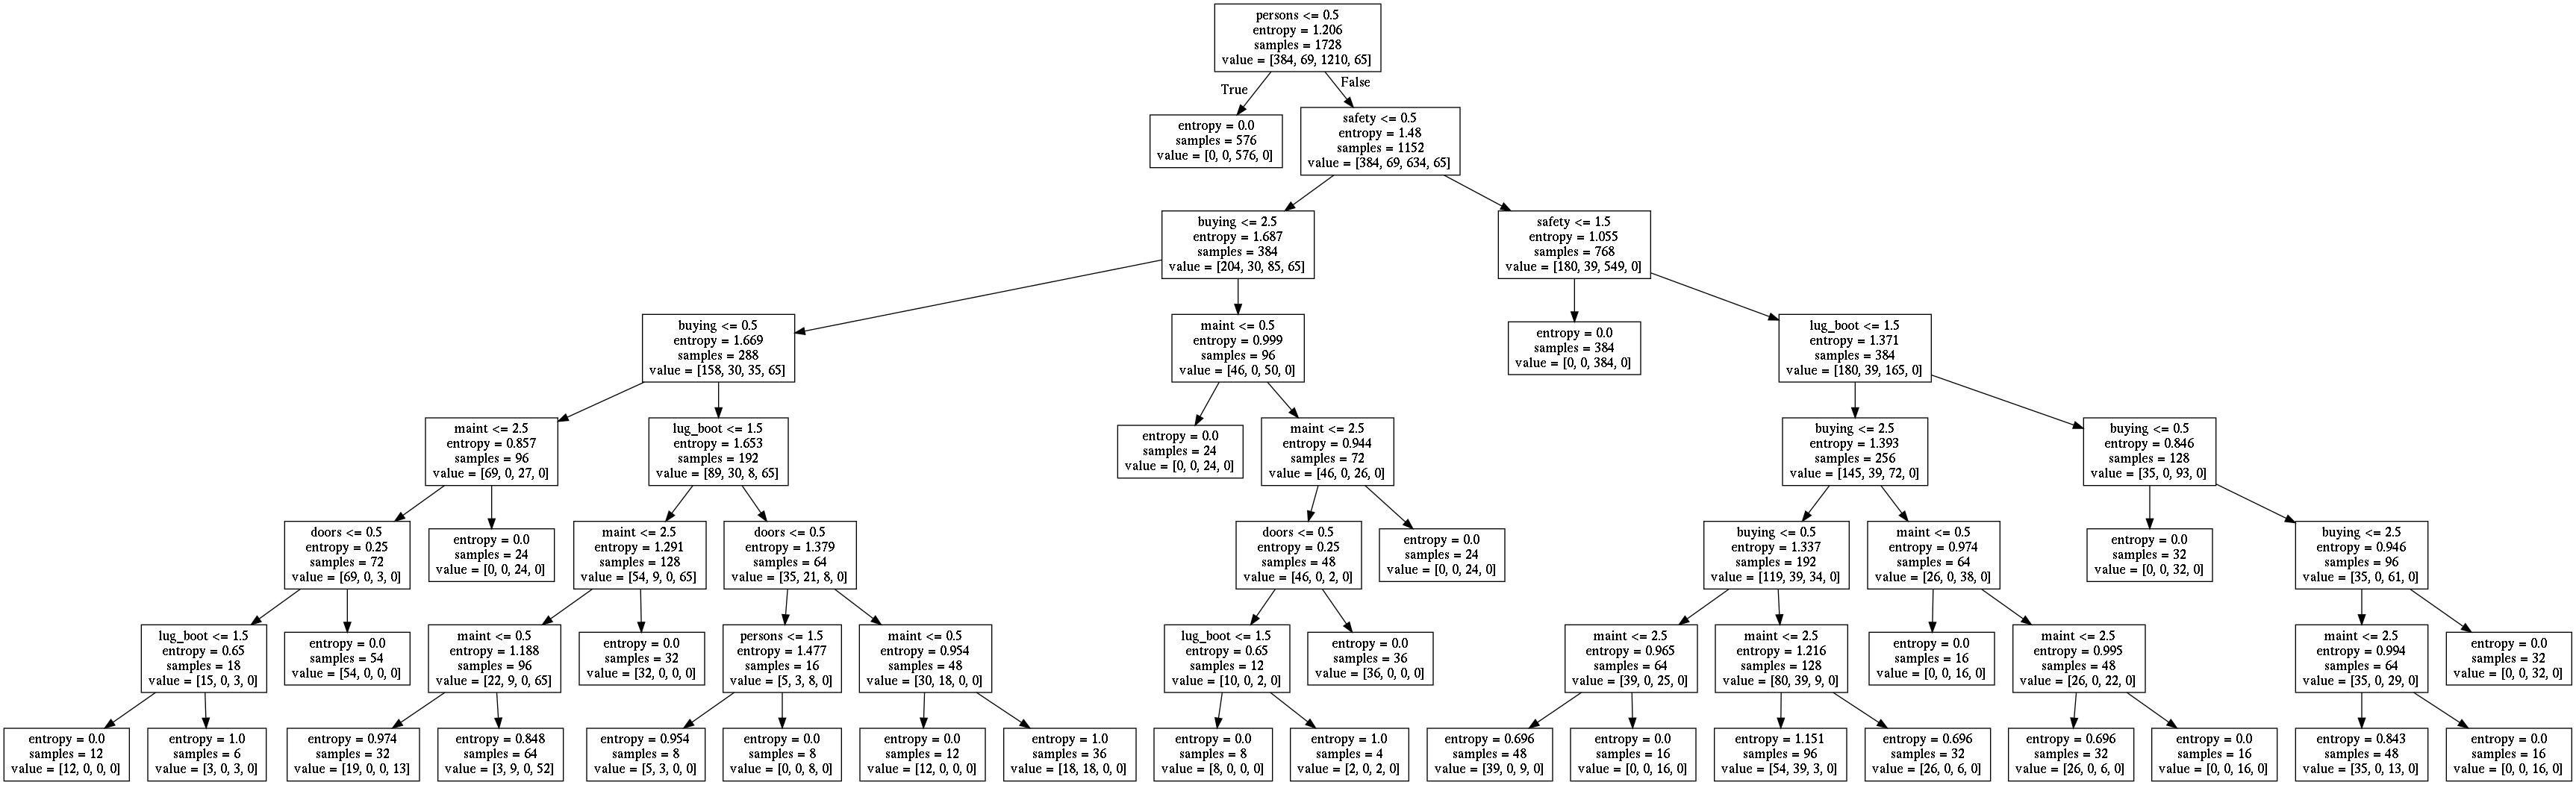

0.92650462963
Criterion: gini, depth: 10


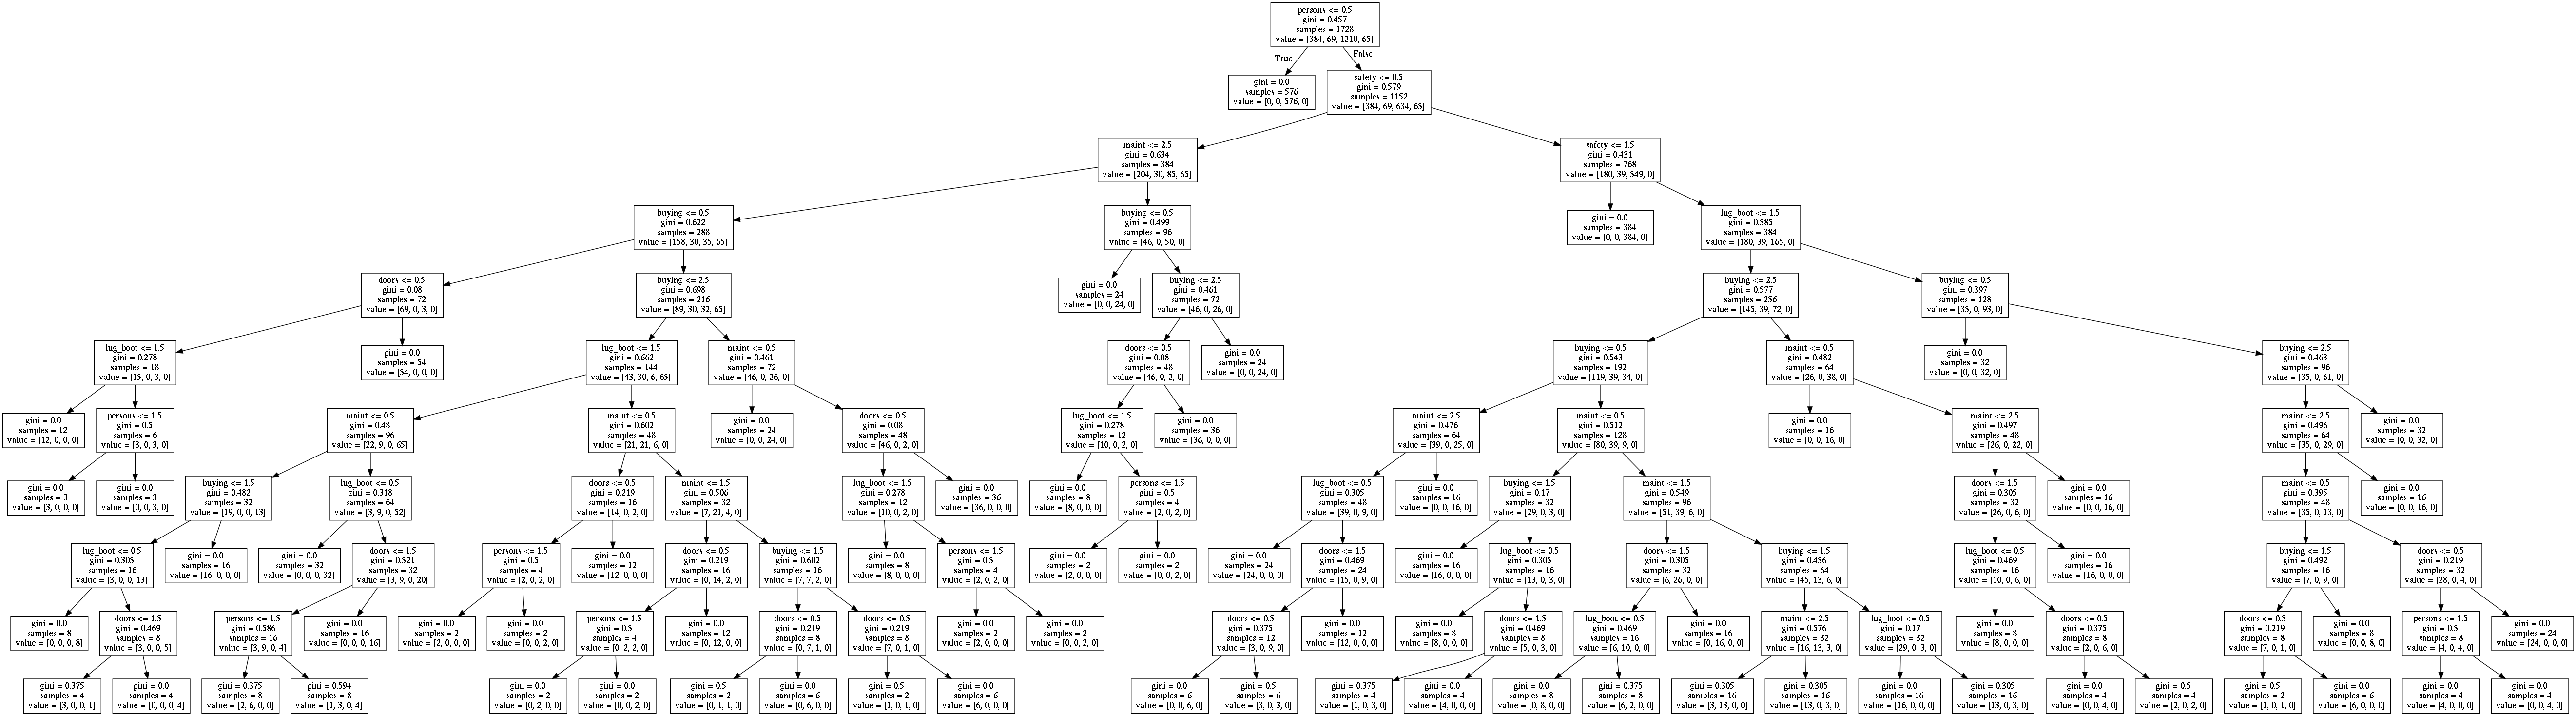

0.984375
Criterion: entropy, depth: 10


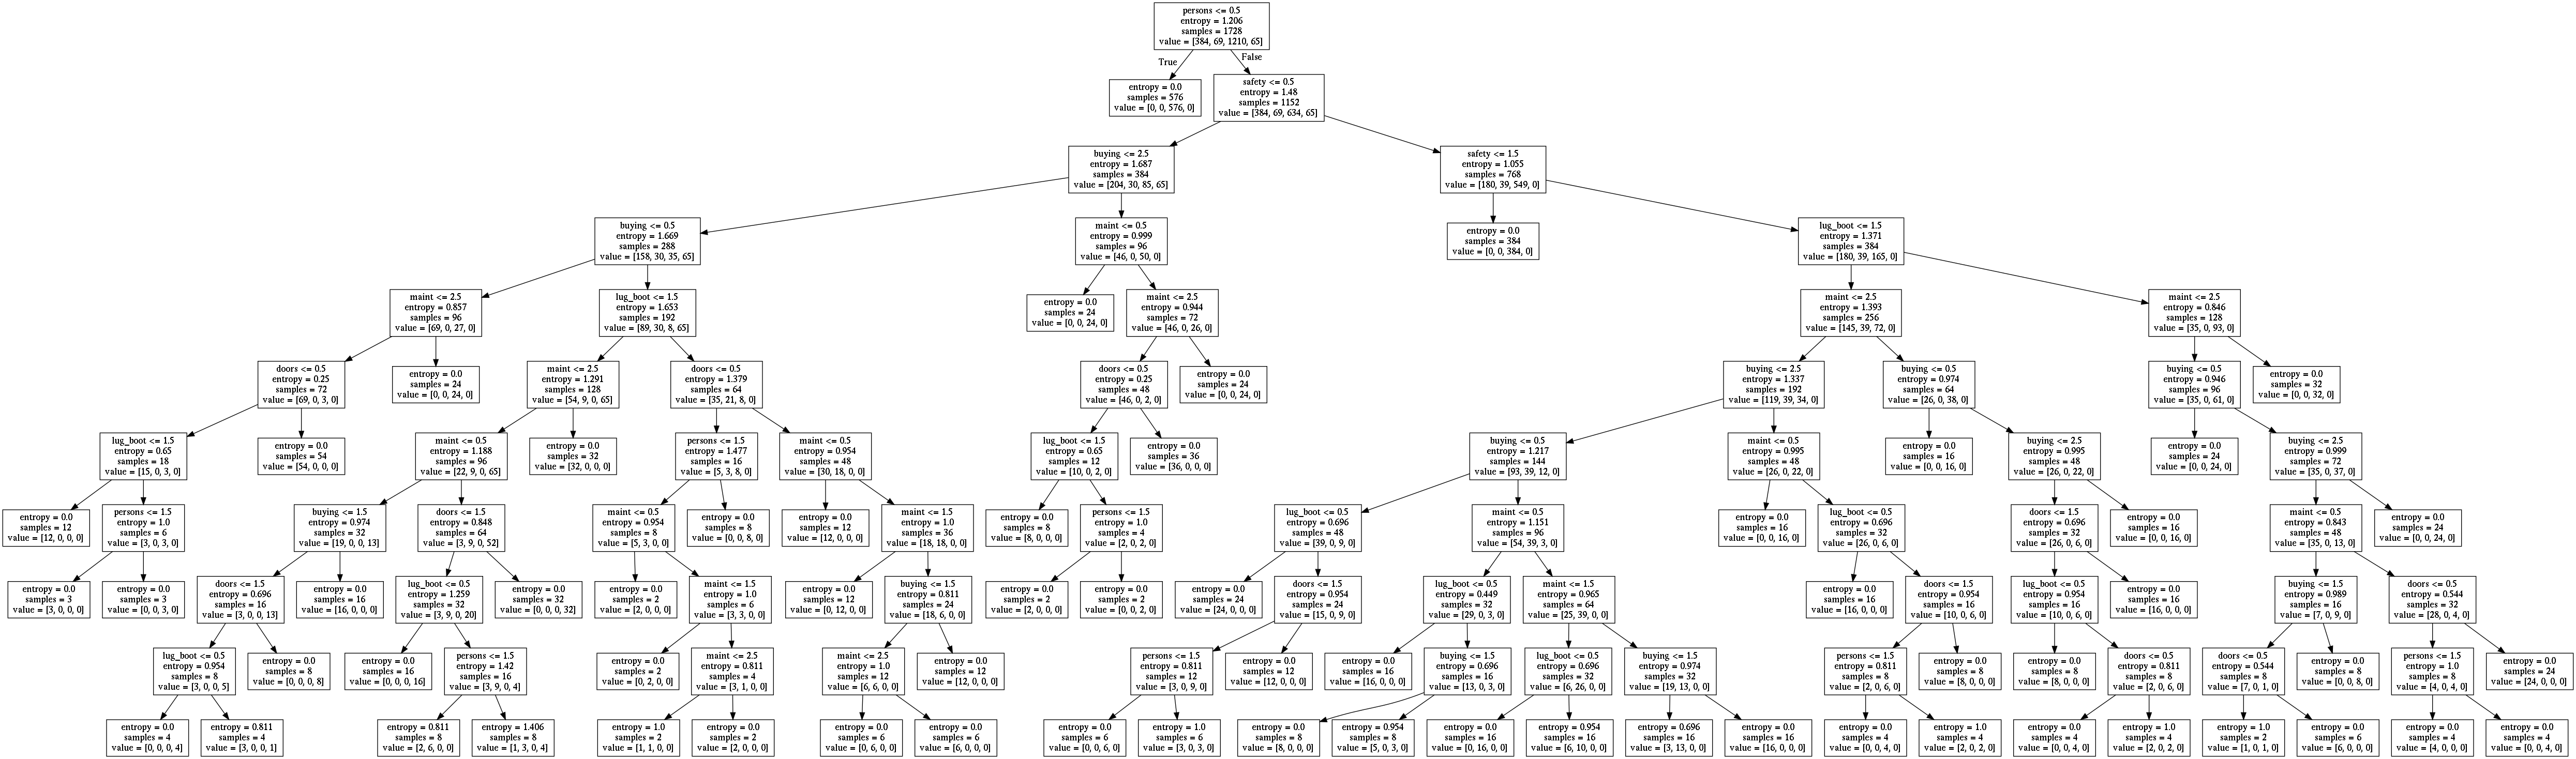

0.983796296296


In [14]:
for d in depths:
    for c in criteria:
        print('Criterion: {}, depth: {}'.format(c, d))
        estimator = DecisionTreeClassifier(criterion=c, max_depth=d)
        estimator.fit(objects, target)
        draw_decision_tree(estimator, column_names[:-1])
        print(accuracy_score(estimator.predict(objects), target))

Как видно, при увеличении глубины дерево улавливает больше зависимостей в тренировочной выборке, а значит становится склонно к переобучению. При это при значениях $max\_depth = 5$ структура дерева остаётся одинаковой.  При $max\_depth = 7$ деревья отличаются совсем незначительно, о чём свидетельствует различие *accuracy_score*.
При $max\_depth = 10$ отличия в структуре дерева тоже незначительны, хоть и их визуализации уже отличаются достаточно сильно, но *accuracy_score* - нет.

## Часть 3. Реализация алгоритма построения дерева решений

##### 50% баллов за задание, оценочное время выполнения 2-3 часа

In [15]:
import numpy as np
from matplotlib import pyplot as plt
%matplotlib inline
from sklearn.base import BaseEstimator
from sklearn.datasets import make_classification, make_regression, load_digits, load_boston
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import accuracy_score, mean_squared_error

Зафиксируем заранее `random_state` (a.k.a. random seed). Это должно повысить вероятность полной воспроизводимости результатов, впрочем, замечено, что тем не менее небольшие флуктуации возможны (например, качества прогнозов дерева, которое мы сейчас вырастим) в случае разных ОС.

In [16]:
RANDOM_STATE = 42

**Необходимо реализовать класс `DecisionTree`**

**Спецификация:**
- класс наследуется от `sklearn.BaseEstimator`;
- конструктор содержит следующие параметры: 
    `max_depth` - максимальная глубина дерева (по умолчанию - `numpy.inf`); 
    `min_samples_split` - минимальное число объектов в вершине, при котором происходит её разбиение (по умолчанию - 2); 
    `criterion` - критерий разбиения (для классификации - 'gini' или 'entropy', для регрессии - 'variance' или 'mad_median'; 
    по умолчанию - 'gini');
    
    Функционал, значение которого максимизируется для поиска оптимального разбиения в данной вершине имеет вид
    $$Q(X, j, t) = F(X) - \dfrac{|X_l|}{|X|} F(X_l) - \dfrac{|X_r|}{|X|} F(X_r),$$
    где $X$ - выборка, находящаяся в текущей вершине, $X_l$ и $X_r$ - разбиение выборки $X$ на две части 
    по предикату $[x_j < t]$, а $F(X)$ -критерий разбиения.
    
    1. Для классификации: пусть $p_i$ - доля объектов $i$-го класса в выборке $X$.
    
        - 'gini': Неопределенность Джини $F(X) = 1 -\sum_{i = 1}^K p_i^2$.
    
        - 'entropy': Энтропия $F(X) = -\sum_{i = 1}^K p_i \log_2(p_i)$.
    
    2. Для регрессии: $y_j = y(x_j)$ - ответ на объекте $x_j$, $y = (y_1, \dots, y_{|X|})$ - вектор ответов.
    
        - 'variance': Дисперсия (среднее квадратичное отклонение от среднего) $F(X) = \dfrac{1}{|X|} \sum_{x_j \in X}(y_j - \dfrac{1}{|X|}\sum_{x_i \in X}y_i)^2$
    
        - 'mad_median': Среднее отклонение от медианы $F(X) = \dfrac{1}{|X|} \sum_{x_j \in X}|y_j - \mathrm{med}(y)|$
    
- класс имеет методы `fit`, `predict` и `predict_proba`;
- метод `fit` принимает матрицу объектов `X` и вектор ответов `y` (объекты `numpy.ndarray`) и возвращает экземпляр класса
    `DecisionTree`, представляющий собой решающее дерево, обученное по выборке `(X, y)` с учётом заданных в конструкторе параметров; 
- метод `predict_proba` принимает матрицу объектов `X` и возвращает матрицу `P` размера `X.shape[0] x K`, где `K` - число классов, такую что $p_{ij}$ есть вероятность принадлежности объекта, заданного $i$-ой строкой матрицы X к классу $j \in \{1, \dots, K\}$.
- метод `predict` принимает матрицу объектов и возвращает вектор предсказанных ответов; в случае классификации - это 
    наиболее многочисленный класс в листе, в который попал объект, а в случае регрессии - среднее значение ответов по 
    всем объектам этого листа;

**Советы по реализации:**

- Обучение дерева можно реализовать простым жадным рекурсивным алгоритмом: каждый раз выбирать наилучшее разбиение (номер признака и порог по нему).
- Если возможных порогов для разбиения будет слишком много, выбор наилучшего разбиения окажется вычислительно очень громоздкой задачей. Можно ограничить множество порогов любым удобным способом (например, посчитать квантили значений каждого признака или просто взяв случайный набор порогов).
- Лучше не подсматривать решение в готовых нагугленных вариантах. От вас требуется сделать всего лишь максимально простую реализацию того, как строится и применяется решающее дерево, а не применимую на практике универсальную библиотеку.

### Реализация (30% баллов)

In [17]:
def entropy(y):  
    p = np.unique(y, return_counts=True)[1] / y.size
    return (-p * np.log2(p)).sum()
    
def gini(y):
    p = np.unique(y, return_counts=True)[1] / y.size
    return 1 - (p ** 2).sum()

def variance(y):
    return y.var()

def mad_median(y):
    return (np.abs(y - np.median(y))).sum() / y.size

In [18]:
from collections import Counter
        
class TreeNode():
    '''Класс вершины дерева'''
    def __init__(self, j=None, t=None, left=None, right=None,
                 answer=None, distribution=None):
        self.j = j    # Номер признака, по которому происходит разбиение
        self.t = t    # Граничное значение признка
        self.left = left    # Ссылка на левое поддерево
        self.right = right    # Ссылка на правое поддерево
        self.answer = answer    # Ответ вершины (для листа)
        self.distribution = distribution    # Распределение по классам (для листа при задаче классификации)

class DecisionTree(BaseEstimator):
    def __init__(self, max_depth=np.inf, min_samples_split=2, 
                 criterion='gini', debug=False):

        self.max_depth = max_depth
        self.min_samples_split = min_samples_split
        self.criterion = criterion
        self.root = None
        
    def get_criterion(self):
        '''Возвращает по названию критерия функцию, реализующую его'''
        if self.criterion == 'gini':
            return gini
        elif self.criterion == 'entropy':
            return entropy
        elif self.criterion == 'variance':
            return variance
        else:
            return mad_median
        
    def create_leaf(self, X, y):
        '''Создаёт лист'''
        if self.criterion in ['gini', 'entropy']:
            c = Counter(self.classes)
            c.update(y)
            answer = c.most_common(1)[0][0]
            distribution = (np.array(list(c.values())) - 1) / y.size
        else:
            answer = y.mean()
            distribution = None
            
        return TreeNode(answer=answer, distribution=distribution)
    
    def split_node(self, X, y, depth=1):
        '''Разбивает вершину на потомков. Основная функция, строящая дерево'''
        
        # Проверяем граничные условия и, если они не выполнены, то создаём из этой вершины лист
        if depth == self.max_depth or y.size < self.min_samples_split:
            return self.create_leaf(X, y)
        
        # Инициализация переменных для поиска минимума функционала Q
        Q_min = np.inf
        j_min = None
        t_min = None
        left_min = None
        right_min = None
        
        for j in range(X.shape[1]):
            # Для каждого признака создаём список порогов
            unique_values = np.sort(np.unique(X[:, j]))
            thresholds = (unique_values[:-1] + unique_values[1:]) / 2
            
            # Для каждого порога вычисляем Q и смотрим, уменьшилось ли значение
            for t in thresholds:
                left = X[:, j] < t
                right = np.logical_not(left)
                
                F = self.get_criterion()
                Q = (left.sum() * F(y[left]) + right.sum() * F(y[right])) / y.size
                
                if Q < Q_min:
                    Q_min = Q
                    j_min = j
                    t_min = t
                    left_min = left
                    right_min = right
        
        # Запускаемся рекурсивно для поддеревьев
        left_node = self.split_node(X[left_min], y[left_min], depth=depth + 1)
        right_node = self.split_node(X[right_min], y[right_min], depth=depth + 1)
        
        return TreeNode(j=j_min, t=t_min, left=left_node, right=right_node)
    
    def fit(self, X, y):
        '''Обучение'''
        # Если решаем задачу классификации, создадим список классов
        if self.criterion in ['gini', 'entropy']:
            self.classes = np.unique(y)
        self.root = self.split_node(X, y)
        
    def find_leaf(self, x):
        '''Находим лист, в который попадает объект x'''
        current_node = self.root
        
        while current_node.left is not None:
            if x[current_node.j] < current_node.t:
                current_node = current_node.left
            else:
                current_node = current_node.right
                
        return current_node
        
    def predict(self, X):
        '''Предсказания для X'''
        y = []
        for x in X:
            y.append(self.find_leaf(x).answer)
        return np.array(y)
        
    def predict_proba(self, X):
        '''В случае классификации - возвращаем распределение по классам для X'''
        y = []
        for x in X:
            y.append(self.find_leaf(x).distribution)
        return np.array(y)

## Тестирование реализованного алгоритма

### Классификация (10% баллов)

С помощью метода `load_digits` загрузите датасет `digits`. Разделите выборку на обучающую и тестовую с помощью метода `train_test_split`, используйте значения параметров `test_size=0.2`, `random_state=42`. Попробуйте обучить неглубокие решающие деревья и убедитесь, что критерии gini и entropy дают разные результаты.

In [19]:
from sklearn.datasets import load_digits
from tqdm import tqdm_notebook

digits = load_digits()
X_train, X_test, y_train, y_test = train_test_split(digits.data, digits.target,
                                                    test_size=0.2, random_state=RANDOM_STATE)

A Jupyter Widget

A Jupyter Widget

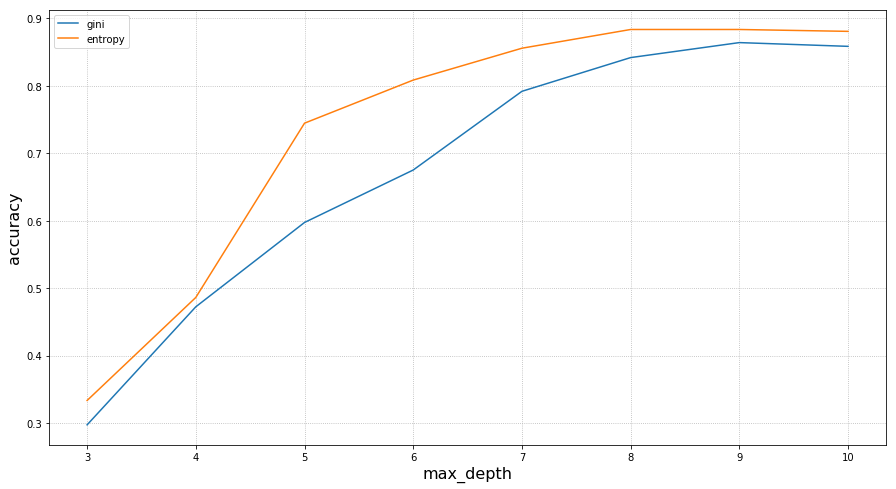

In [20]:
criteria = ['gini', 'entropy']
depths = range(3, 11)
lines = []

for c in criteria:
    line = []
    for d in tqdm_notebook(depths, leave=False):
        tree = DecisionTree(max_depth=d, criterion=c)
        tree.fit(X_train, y_train)
        prediction = tree.predict(X_test)
        #print(y_test, prediction)
        line.append(accuracy_score(y_test, prediction))
    lines.append(line)
    
plt.figure(figsize=(15, 8))
for i, label in enumerate(criteria):
    plt.plot(depths, lines[i], label=label)
plt.grid(ls=':')
plt.legend()
plt.xlabel('max_depth', fontsize=16)
plt.ylabel('accuracy', fontsize=16)
plt.show()

С помощью 5-кратной кросс-валидации (`GridSearchCV`) подберите оптимальное значение параметров `max_depth` и `criterion`. Для параметра `max_depth` используйте диапазон значений - range(3, 11), а для criterion - {'gini', 'entropy'}. Критерий качества `scoring`='accuracy'.

In [21]:
grid = {'criterion' : criteria, 'max_depth' : depths}
gscv = GridSearchCV(DecisionTree(), param_grid=grid, scoring='accuracy', cv=5)
%time gscv.fit(X_train, y_train)

CPU times: user 2min 25s, sys: 36 ms, total: 2min 25s
Wall time: 2min 25s


GridSearchCV(cv=5, error_score='raise',
       estimator=DecisionTree(criterion='gini', debug=None, max_depth=inf, min_samples_split=2),
       fit_params=None, iid=True, n_jobs=1,
       param_grid={'criterion': ['gini', 'entropy'], 'max_depth': range(3, 11)},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring='accuracy', verbose=0)

Постройте графики средних значений критерия качества `accuracy` для критериев `gini` и `entropy` в зависимости от `max_depth`.

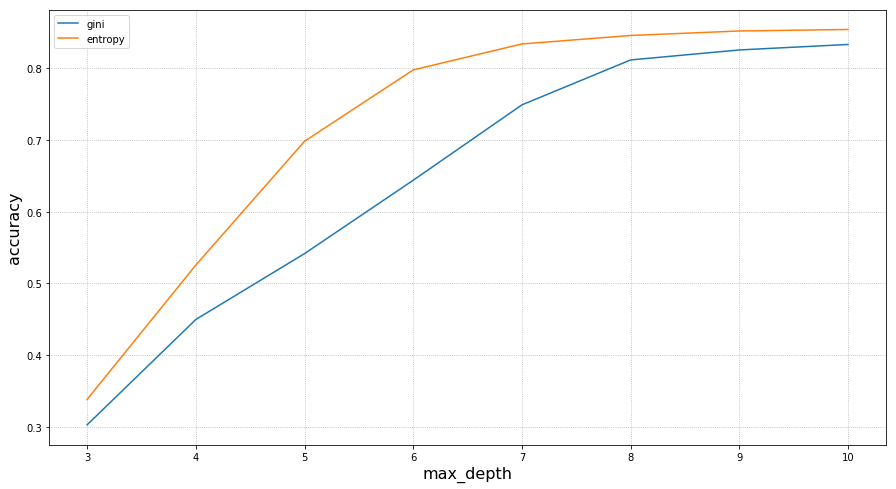

In [22]:
scores = gscv.cv_results_['mean_test_score']

plt.figure(figsize=(15, 8))
plt.plot(depths, scores[:len(depths)], label=criteria[0])
plt.plot(depths, scores[-len(depths):], label=criteria[1])
plt.grid(ls=':')
plt.legend()
plt.xlabel('max_depth', fontsize=16)
plt.ylabel('accuracy', fontsize=16)
plt.show()

Проанализируйте полученные графики. Чему равны найденные оптимальные значения параметров max_depth и criterion?

In [23]:
print(gscv.best_params_)
print(gscv.best_score_)

{'criterion': 'entropy', 'max_depth': 10}
0.853862212944


**Ответ:**

Как видно из графика, энтропия даёт более качественный уровень предсказаний на всех рассмотренных значениях максимальной глубины. При этом мы ограничивались такими значениями глубин, что *acuracy_score* продолжал расти, что позволяет сделать вывод о том, что мы не переобучались.

Используя найденные оптимальные значения max_depth и criterion, обучите решающее дерево на X_train, y_train и вычислите вероятности принадлежности к классам для X_test.

In [24]:
tree = DecisionTree(criterion='entropy', max_depth=10)
tree.fit(X_train, y_train)
dist = tree.predict_proba(X_test)
dist[np.logical_and(dist < 1, dist > 0)].size / 2

26.0

Для полученной матрицы вычислите усредненные по всем объектам из `X_test` значения вероятностей принадлежности к классам.

Чему примерно равна максимальная вероятность в полученном векторе?

In [25]:
print(dist.mean(axis=0))
print('%.3f' % dist.mean(axis=0).max())

[ 0.09500624  0.09007937  0.08293651  0.09722222  0.1212963   0.13472222
  0.09563492  0.10555556  0.07523185  0.10231481]
0.135


**Ответ:**

Как видно, максимальное значение в векторе равно $\sim 0.135$. При этом распределение по классам примерно равномерное.

### Регрессия (10% баллов)

С помощью метода `load_boston` загрузите датасет `boston`. Разделите выборку на обучающую и тестовую с помощью метода `train_test_split`, используйте значения параметров `test_size=0.2`, `random_state=42`. Попробуйте обучить неглубокие регрессионные деревья и убедитесь, что критерии `variance` и `mad_median` дают разные результаты.

In [26]:
from sklearn.datasets import load_boston

boston = load_boston()
X_train, X_test, y_train, y_test = train_test_split(boston['data'], boston['target'],
                                                    test_size=0.2, random_state=RANDOM_STATE)

A Jupyter Widget

A Jupyter Widget

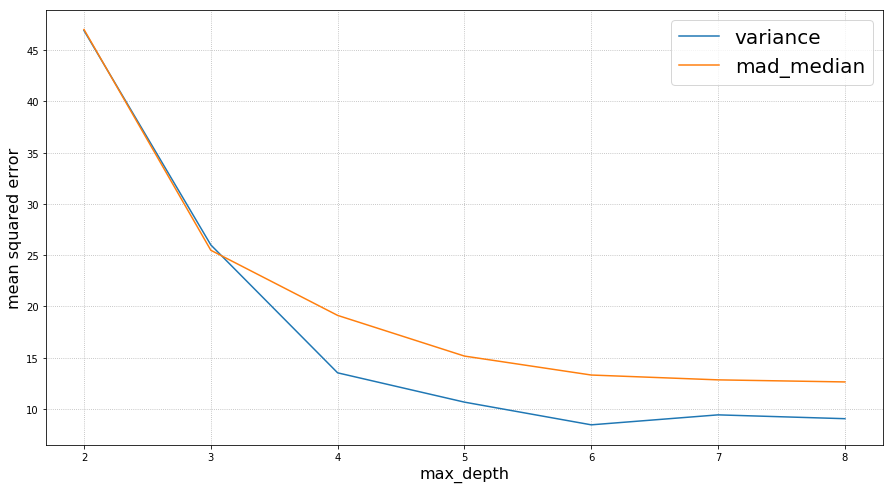

In [27]:
criteria = ['variance', 'mad_median']
depths = range(2, 9)
lines = []

for c in criteria:
    line = []
    for d in tqdm_notebook(depths, leave=False):
        tree = DecisionTree(max_depth=d, criterion=c)
        tree.fit(X_train, y_train)
        prediction = tree.predict(X_test)
        #print(y_test, prediction)
        line.append(mean_squared_error(y_test, prediction))
    lines.append(line)
    
plt.figure(figsize=(15, 8))
for i, label in enumerate(criteria):
    plt.plot(depths, lines[i], label=label)
plt.grid(ls=':')
plt.legend(fontsize=20)
plt.xlabel('max_depth', fontsize=16)
plt.ylabel('mean squared error', fontsize=16)
plt.show()

С помощью 5-кратной кросс-валидации подберите оптимальное значение параметров `max_depth` и `criterion`. Для параметра `max_depth` используйте диапазон значений - `range(2, 9)`, а для `criterion` - {'variance', 'mad_median'}. Критерий качества `scoring`='neg_mean_squared_error'.

In [28]:
grid = {'criterion' : criteria, 'max_depth' : depths}
gscv = GridSearchCV(DecisionTree(), param_grid=grid, scoring='neg_mean_squared_error', cv=5)
%time gscv.fit(X_train, y_train)

CPU times: user 38.8 s, sys: 8 ms, total: 38.8 s
Wall time: 38.8 s


GridSearchCV(cv=5, error_score='raise',
       estimator=DecisionTree(criterion='gini', debug=None, max_depth=inf, min_samples_split=2),
       fit_params=None, iid=True, n_jobs=1,
       param_grid={'criterion': ['variance', 'mad_median'], 'max_depth': range(2, 9)},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring='neg_mean_squared_error', verbose=0)

Постройте графики средних значений критерия качества `neg_mean_squared_error` для критериев `variance` и `mad_median` в зависимости от `max_depth`.

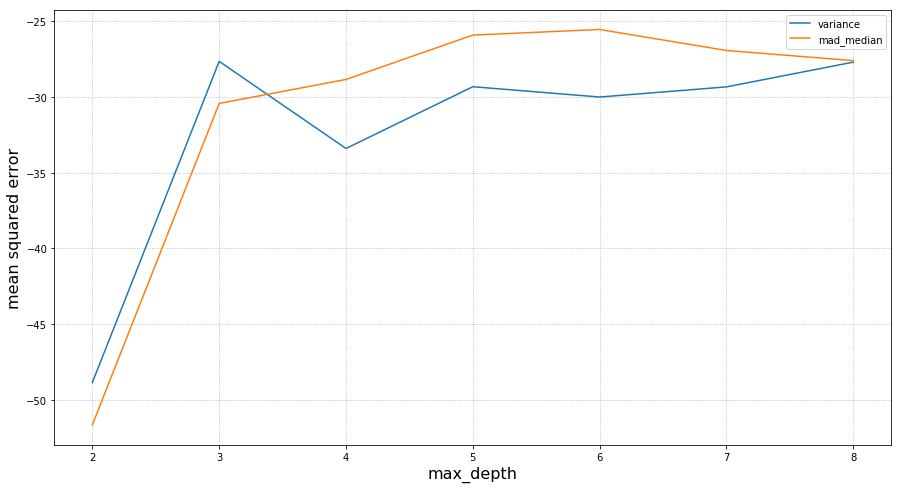

In [29]:
scores = gscv.cv_results_['mean_test_score']

plt.figure(figsize=(15, 8))
plt.plot(depths, scores[:len(depths)], label=criteria[0])
plt.plot(depths, scores[-len(depths):], label=criteria[1])
plt.grid(ls=':')
plt.legend()
plt.xlabel('max_depth', fontsize=16)
plt.ylabel('mean squared error', fontsize=16)
plt.show()

Проанализируйте полученные графики. Чему равны найденные оптимальные значения параметров max_depth и criterion?

In [30]:
print(gscv.best_params_)
print(gscv.best_score_)

{'criterion': 'mad_median', 'max_depth': 6}
-25.5557703566


**Ответ:**

По графику видно, что при небольшой глубине дерева лучший результат демонстрирует *variance*, но при увеличении глубины *mad_median* показывает значительно лучший результат, хоть и при глубине 8 они одинаковы. Это связано с фиксированным *random_seed*.